In [3]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Running GENE on LUMI to find mode transition within error bounds

Each parameter will be kept at the nominal except one exception. The exception will be altered through it's error bound and the growthrate will be plotted as a function of the exception parameter. 

In [4]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import Config
config = Config(local=True)


samplers = []
n_samples = 50
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
nominal = [2.7954880, 5.3871083, 1.5417906]
bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value
for p,b in zip(parameters, bounds):
    samplers.append(Grid([b], n_samples,[p]))

remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
ex_id_base = 'modeTransTest_'
ex_ids=[ex_id_base+str(i) for i in range(len(samplers))]
data_gens = []
for sampler, remote_save_name, ex_id in zip(samplers, remote_save_names, ex_ids):
    data_gens.append(DataGen(config, sampler, remote_save_name=remote_save_name, single_run_timelim=1000000, single_run_simtimelim=300, num_workers=2, ex_id=ex_id))
# import os
# import sys
# pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
# print('PATHAP',pathap)
# sys.path.append(pathap)

# from GENE_ML.gene_ml.samplers.grid import Grid
# from GENE_ML.gene_ml.executors.ScanExecutor import ScanExecutor
# from GENE_ML.gene_ml.runners.GENErunner import GENErunner
# from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

# sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))
# parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
# nominal = [2.7954880, 5.3871083, 1.5417906]

# bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value

# samplers = []
# n_samples = 100
# for p,b in zip(parameters, bounds):
#     samplers.append(Grid([b], n_samples,[p]))


# ##Parser
# #The parsers main function is write_input_file
# # wite_input_file takes a parameters file from base_params_path and a set of points in the form of a dict {param1:[point1,point2...], param2:[point1,point2...]...} 
# #  It will then create a parameters file that can scan over all the points.
# base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')
# save_dir = "temp/"
# parser = GENE_scan_parser(save_dir, base_params_path, remote_save_dir=None)

# ## Runner
# #The Runner is responsible for actually running a parameters file on lumi. Its main function is code_run.
# # code_run will take the set of points named samples and parse them into a parameters file.
# #  It then uses ssh to run GENE with this parametres file and a passed sbatch script.
# host = 'lumi3' #needs to be configured in /home/<user>/.ssh/config
# sbatch_base_path = os.path.join('sbatch_base')
# guess_sample_wallseconds = 200 # a guess for the number of seconds it takes to run one sample.
# remote_run_dir = '/project/project_462000451/gene/'
# runner = GENErunner(parser, host, sbatch_base_path, guess_sample_wallseconds, remote_run_dir)

# ##Executor
# #The executor will divide the samples into batches; one for each worker. Each batch will be ran in paralell in seperate sbatch jobs. 
# # The executor should alter a base batch script to account for that less samples will be ran. 
# num_workers = 2
# run_names = ['modeTrans3-'+p for p in parameters]
# remote_save_dirs = [f'/scratch/project_462000451/gene_out/gene_auto/{run_name}' for run_name in run_names]
# executors = []
# for sampler, remote_save_dir in zip(samplers, remote_save_dirs):
#     executors.append(ScanExecutor(num_workers, sampler, runner, remote_save_dir=remote_save_dir))


PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


In [3]:
# import numpy as np
# ex_ids = np.arange(len(executors))
# for data_gen in data_gens:
#     data_gen.executor.start_runs()

In [4]:
class parent:
    def __init__(self, att):
        self.att = att

class child(parent):
    def yo(self):
        print('nonsence')
child_instance = child(att='at')

print(child_instance.att)
child_instance.att = 'kkk'
print(child_instance.att)


at
kkk


# Pulling Data from LUMI

The data loaded was created by scanning over ion and electron temperature gradients within their margin of uncertainty. 

In [5]:
# remote_save_names = [r+'50' for r in remote_save_names]

In [5]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import os
host = 'lumi3'

test_percentage = 0
GENE_groundTruth = []

for data_gen in data_gens:
    ## If the data is already loaded from the remote to local .../scanlogs/<data_name> then the host and remote path can be ommitted
    GENE_groundTruth.append(ScanData(data_gen.remote_save_name, parser=data_gen.parser, config=config, host=host, remote_save_dir=data_gen.remote_save_dir,  test_percentage=test_percentage))


Initialising dataset
SSH PATH lumi3:/scratch/project_462000451/gene_out/gene_auto/modeTrans-highprec-_grp_species_0-omt
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER 

In [10]:
GENE_groundTruth[0].df.head()

,run_time,omt1,growthrate,frequency
0,30.330,4.000000,0.08769,0.03151
1,31.028,4.055102,0.08940,0.03205
2,27.473,4.110204,0.09110,0.03260
3,27.004,4.165306,0.09278,0.03314
4,25.307,4.220408,0.09445,0.03369


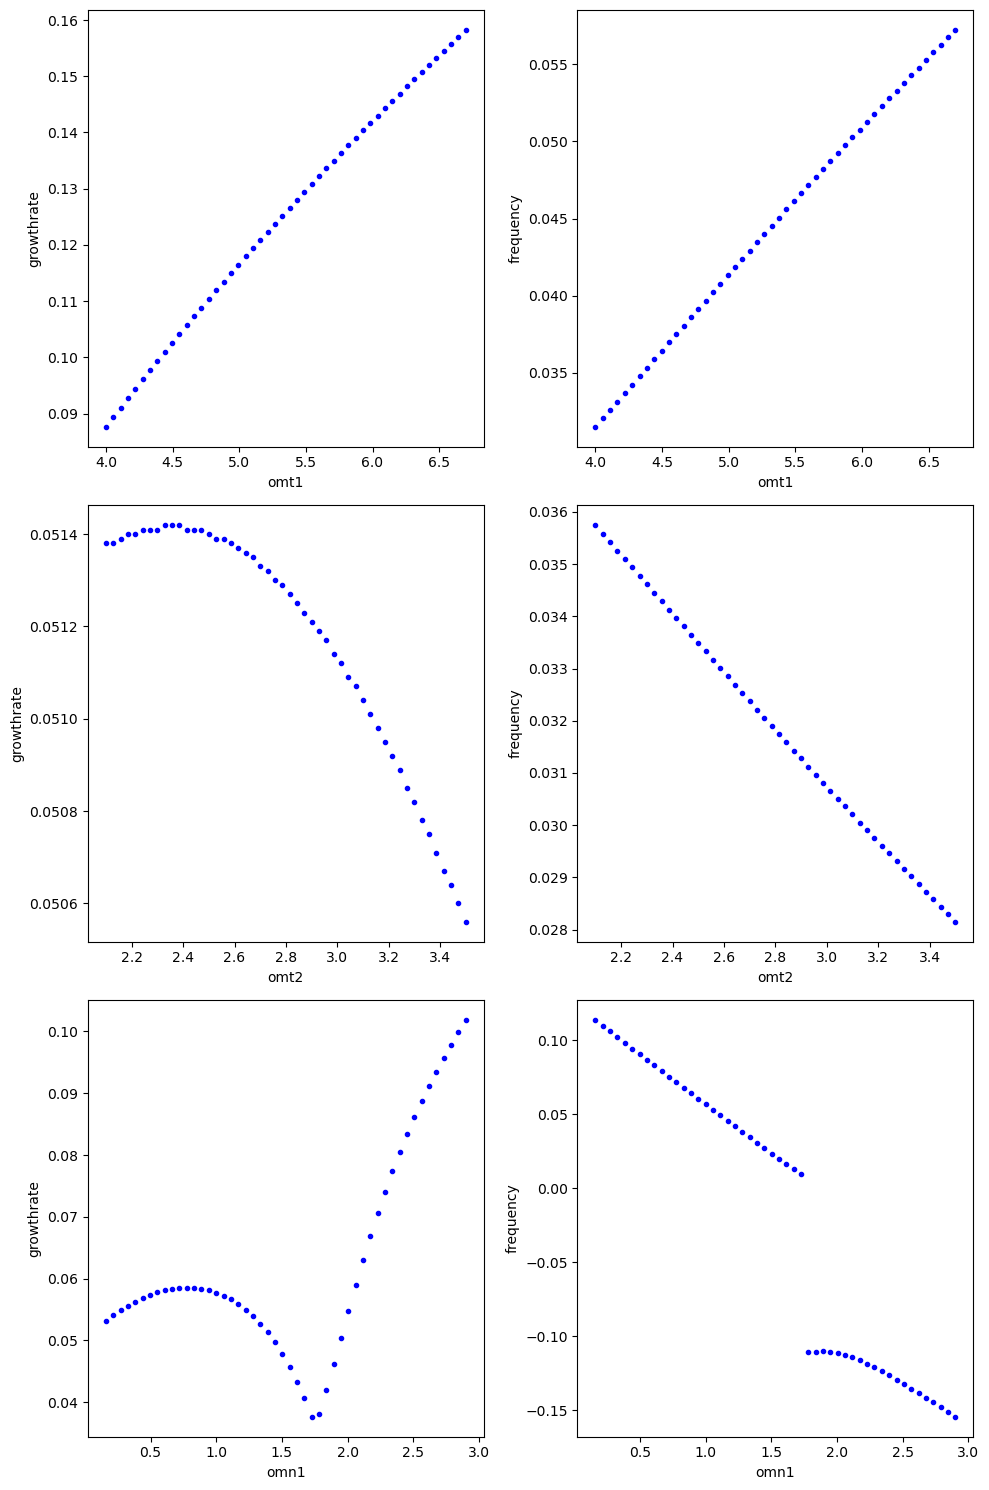

In [11]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        col = GENE_groundTruth[i].df.columns.values.tolist()
        x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        AX[i][j].plot(x, y, '.b')
        AX[i][j].set_xlabel(col[1])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
plt.show(figure)


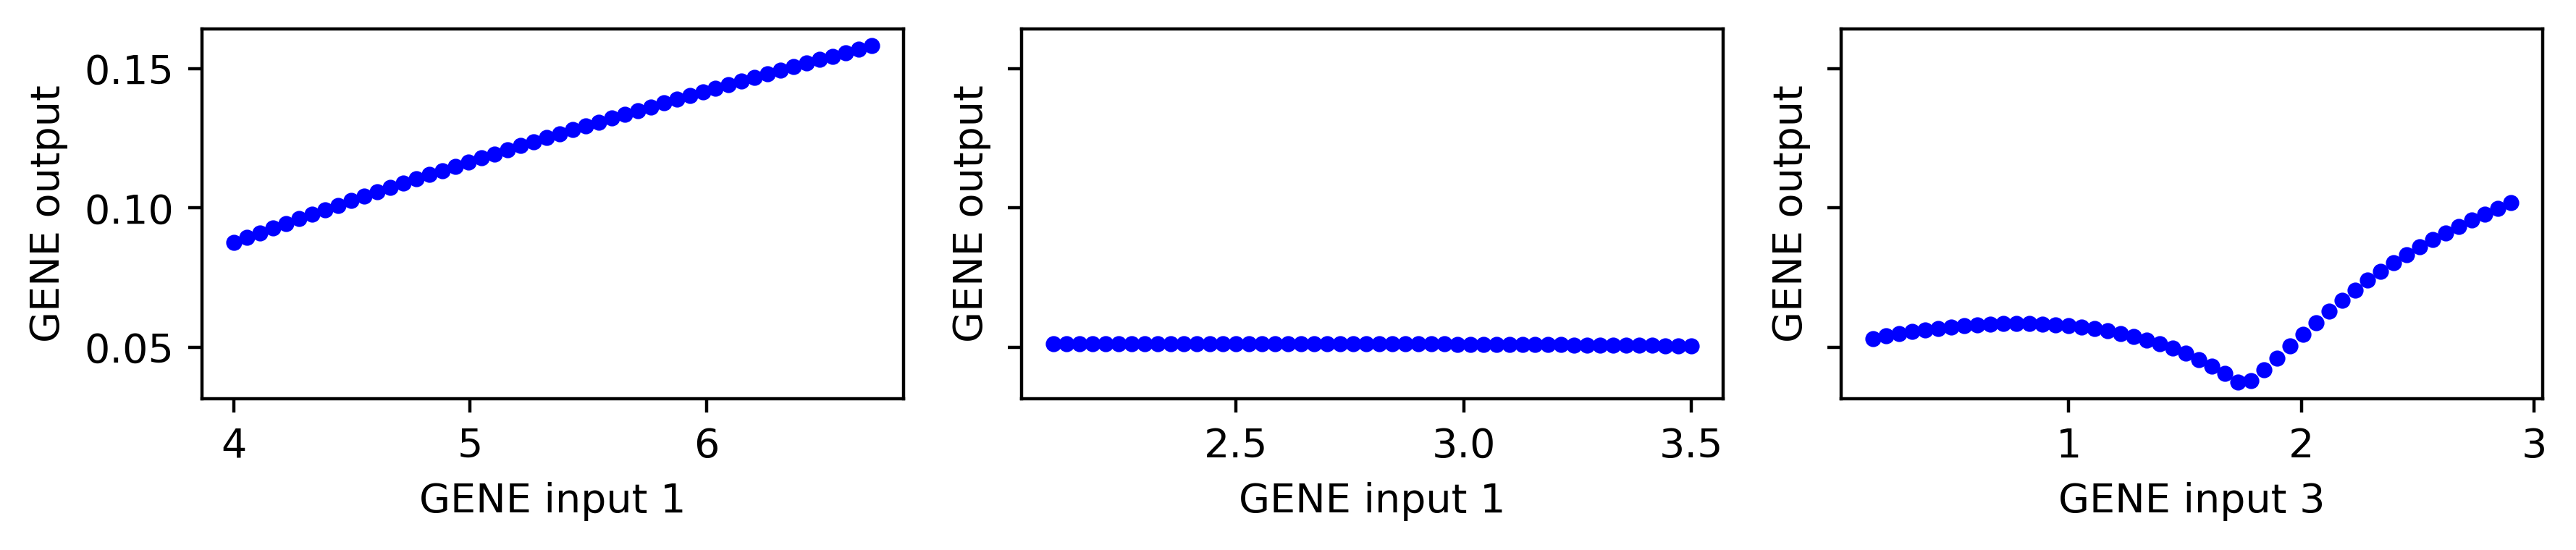

In [30]:
import matplotlib.pyplot as plt
gene_out = ['growthrate']
width = 3
height =2
nrow = len(gene_out)
ncol = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height), sharey=True, dpi=400)
x_labels = ['GENE input 1','GENE input 1', 'GENE input 3']
for i in range(len(AX)):
    col = GENE_groundTruth[i].df.columns.values.tolist()
    x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
    y = GENE_groundTruth[i].df[gene_out[0]].to_numpy(dtype=float)
    AX[i].plot(x, y, '.b')
    AX[i].set_xlabel(x_labels[i])
    AX[i].set_ylabel('GENE output')
        
figure.tight_layout()
plt.show(figure)


# Plotting Run Time Dependance

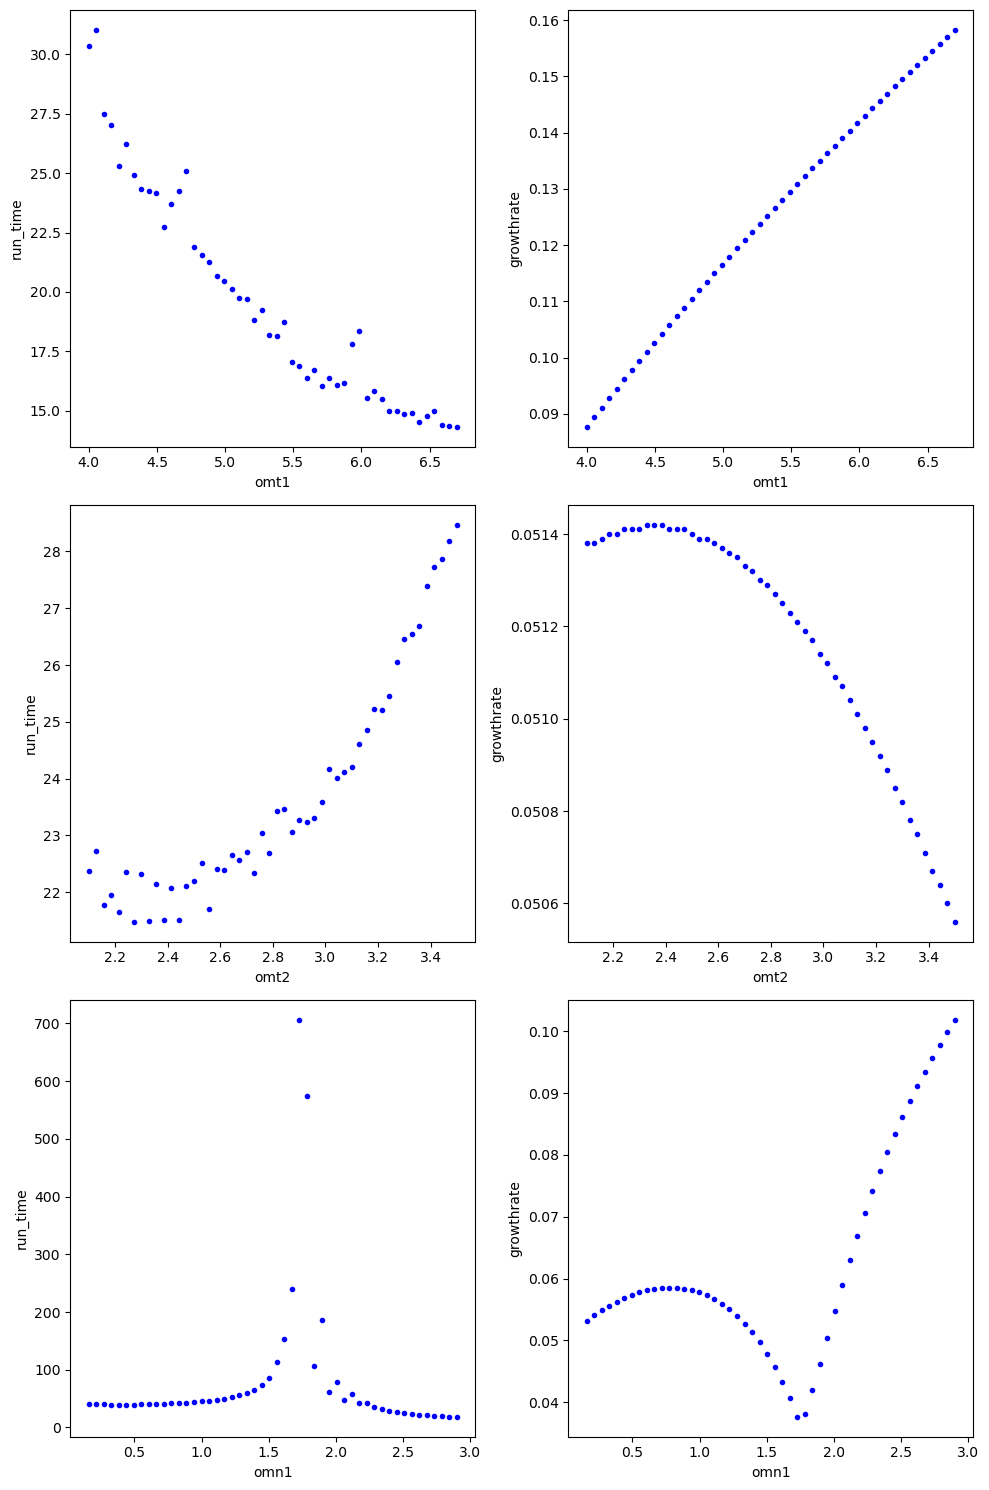

In [9]:
import matplotlib.pyplot as plt
gene_out = ['run_time','growthrate']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        col = GENE_groundTruth[i].df.columns.values.tolist()
        x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        AX[i][j].plot(x, y, '.b')
        AX[i][j].set_xlabel(col[1])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
plt.show(figure)


# Running SSG points on GENE-Lumi for ssg_poly training

In [10]:
print(parameters)
print(bounds)

['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
[(4, 6.7), (2.1, 3.5), (0.16, 2.9)]


In [6]:
from GENE_ML.gene_ml.samplers.static_sparse_grid import StaticSparseGrid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import Config
config = Config(local=True)

ssg_sampler = StaticSparseGrid(parameters=parameters, bounds=bounds, level=7)
print("NUM SSG SAMPLES",ssg_sampler.num_samples)
# ssg_datagen = DataGen(config, ssg_sampler, ex_id='ssg', remote_save_name='ssg-highprec_2omt_omn', guess_sample_wallseconds=200, num_workers=2)
# print('PARAMETERS IN SAMPLER', ssg_datagen.executor.sampler.samples.keys())

POINTS SHAPE (84, 3)
 no points for dim = 3 and level = 7 is n = 84
NUM SSG SAMPLES 84


In [12]:
# ssg_datagen.executor.start_runs(ex_id='ssg-highprec_2omt_omn')

# Collecting SSG-point results from LUMI for growthrate and frequency of microinstabilities

In [7]:
from GENE_ML.gene_ml.dataset.ScanData import SSG_ScanData
from config import Config
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
config = Config(local=True)

parser = GENE_scan_parser(config)

remote_save_dir = '/scratch/project_462000451/gene_out/gene_auto/ssg-highprec_2omt_omn'
config = Config(local=True)
import os
host = 'lumi'
data_name = 'data_ssg_2omt-highprec_omn'
test_percentage = 0

ssg_data = SSG_ScanData(data_name, parser, config, host=host, remote_save_dir=remote_save_dir,  test_percentage=test_percentage)
ssg_data.match_sampler(ssg_sampler)
ssg_data.df


Initialising dataset
SSH PATH lumi:/scratch/project_462000451/gene_out/gene_auto/ssg-highprec_2omt_omn
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-1_scanfiles-0.log

84 SAMPLES RAN OUT OF 99 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 84
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PE

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,16.739,5.35,2.800000,1.530000,0.12091,0.06387
1,17.068,6.70,2.800000,1.530000,0.14990,0.07666
2,15.260,5.35,3.500000,1.530000,0.12286,0.05903
3,16.935,5.35,2.800000,2.900000,0.09682,-0.03230
4,14.677,4.00,2.800000,1.530000,0.08748,0.04885
...,...,...,...,...,...,...
79,13.279,5.35,2.338905,0.160000,0.11208,0.14882
80,16.836,5.35,3.204145,2.320970,0.11286,0.00899
81,14.242,5.35,2.100000,0.627572,0.11620,0.12186
82,15.789,5.35,3.500000,2.679778,0.10445,-0.02279


In [32]:
ssg_data.df.head()

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,16.739,5.35,2.8,1.53,0.12091,0.06387
1,17.068,6.70,2.8,1.53,0.14990,0.07666
2,15.260,5.35,3.5,1.53,0.12286,0.05903
3,16.935,5.35,2.8,2.90,0.09682,-0.03230
4,14.677,4.00,2.8,1.53,0.08748,0.04885


# Fitting the ssg_poly to the ssg_data

In [8]:
from GENE_ML.gene_ml.models.SSG_POLY import SSG_POLY
poly = SSG_POLY(ssg_sampler=ssg_sampler, name='ssg_poly')
poly.train(y=ssg_data.growthrates)

In [15]:
# import numpoly

# polynomial = poly.get_polynomial()

# polynomial(1,2,3)



In [16]:
# polynomial([1,3],[2,4],[3,5])


In [9]:
import numpy as np
import pandas as pd
nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
nominal_df = pd.DataFrame(nominal_block)
nominal_df.columns=parameters

nominal_df

,_grp_species_0-omt,_grp_species_1-omt,species-omn
0,2.795488,5.387108,1.541791
1,2.795488,5.387108,1.541791
2,2.795488,5.387108,1.541791
3,2.795488,5.387108,1.541791
4,2.795488,5.387108,1.541791
5,2.795488,5.387108,1.541791
6,2.795488,5.387108,1.541791
7,2.795488,5.387108,1.541791
8,2.795488,5.387108,1.541791
9,2.795488,5.387108,1.541791


In [18]:
print(GENE_groundTruth[0].df.head(5))
print(ssg_sampler.parameters)
print(ssg_data.df.head())
# ssg_data.set_from_df()
print(ssg_data.x)

  run_time      omt1 growthrate frequency
0   30.330  4.000000    0.08769   0.03151
1   31.028  4.055102    0.08940   0.03205
2   27.473  4.110204    0.09110   0.03260
3   27.004  4.165306    0.09278   0.03314
4   25.307  4.220408    0.09445   0.03369
['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
  run_time  _grp_species_0-omt  _grp_species_1-omt  species-omn growthrate  \
0   16.739                5.35                 2.8         1.53    0.12091   
1   17.068                6.70                 2.8         1.53    0.14990   
2   15.260                5.35                 3.5         1.53    0.12286   
3   16.935                5.35                 2.8         2.90    0.09682   
4   14.677                4.00                 2.8         1.53    0.08748   

  frequency  
0   0.06387  
1   0.07666  
2   0.05903  
3  -0.03230  
4   0.04885  
[[5.35       2.8        1.53      ]
 [6.7        2.8        1.53      ]
 [5.35       3.5        1.53      ]
 [5.35       2.8        2.9

# Putting the ground truth in the correct format for inference

i.e. adding in the nominal values.

In [10]:
import pandas as pd
# gt_df = GENE_groundTruth[0].df
# new_df = nominal_df
# new_head = new_df.columns.values.tolist()
# gt_head = gt_df.columns.values.tolist()
# new_df[new_head[0]] = gt_df[gt_head[0]].tolist()
# new_df

for i in range(len(parameters)):
    new_df = nominal_df.copy()
    col = GENE_groundTruth[i].df.columns.values.tolist()
    new_df[parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
    new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
    new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
    new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
    GENE_groundTruth[i].df = new_df
    GENE_groundTruth[i].set_from_df()
    
    print(GENE_groundTruth[i].x[0:5])
    print(parameters)
    print('NEW DF', GENE_groundTruth[i].df.head(5))


TEST PERCENTAGE IS 0, NO SPLIT
[[4.        5.3871083 1.5417906]
 [4.055102  5.3871083 1.5417906]
 [4.110204  5.3871083 1.5417906]
 [4.165306  5.3871083 1.5417906]
 [4.220408  5.3871083 1.5417906]]
['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
NEW DF   run_time  _grp_species_0-omt  _grp_species_1-omt  species-omn growthrate  \
0   30.330            4.000000            5.387108     1.541791    0.08769   
1   31.028            4.055102            5.387108     1.541791    0.08940   
2   27.473            4.110204            5.387108     1.541791    0.09110   
3   27.004            4.165306            5.387108     1.541791    0.09278   
4   25.307            4.220408            5.387108     1.541791    0.09445   

  frequency  
0   0.03151  
1   0.03205  
2   0.03260  
3   0.03314  
4   0.03369  
TEST PERCENTAGE IS 0, NO SPLIT
[[2.795488  2.1       1.5417906]
 [2.795488  2.128571  1.5417906]
 [2.795488  2.157143  1.5417906]
 [2.795488  2.185714  1.5417906]
 [2.795488  2.214286

In [33]:
GENE_groundTruth[0].df.head()

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


In [20]:
# te = GENE_groundTruth[0].x

# te1, te2, te3 = te.T

# te1

# Save results of ssg_poly Ground Truth reference point inference

In [12]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_poly_gt = ResultsGroundTruthTest(name='results_poly_gt-highprec')

if os.path.exists(results_poly_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_poly_gt = results_poly_gt.load()
    print(f'{results_poly_gt.name} IS LOADED')
else:
    results_poly_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_poly_gt.growthrates.append(poly.predict(GENE_groundTruth[i].x))
    results_poly_gt.save()


LOADING RESULTS FROM FILE

results_poly_gt-highprec IS LOADED


# Plotting SSG results of ground truth experiment

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


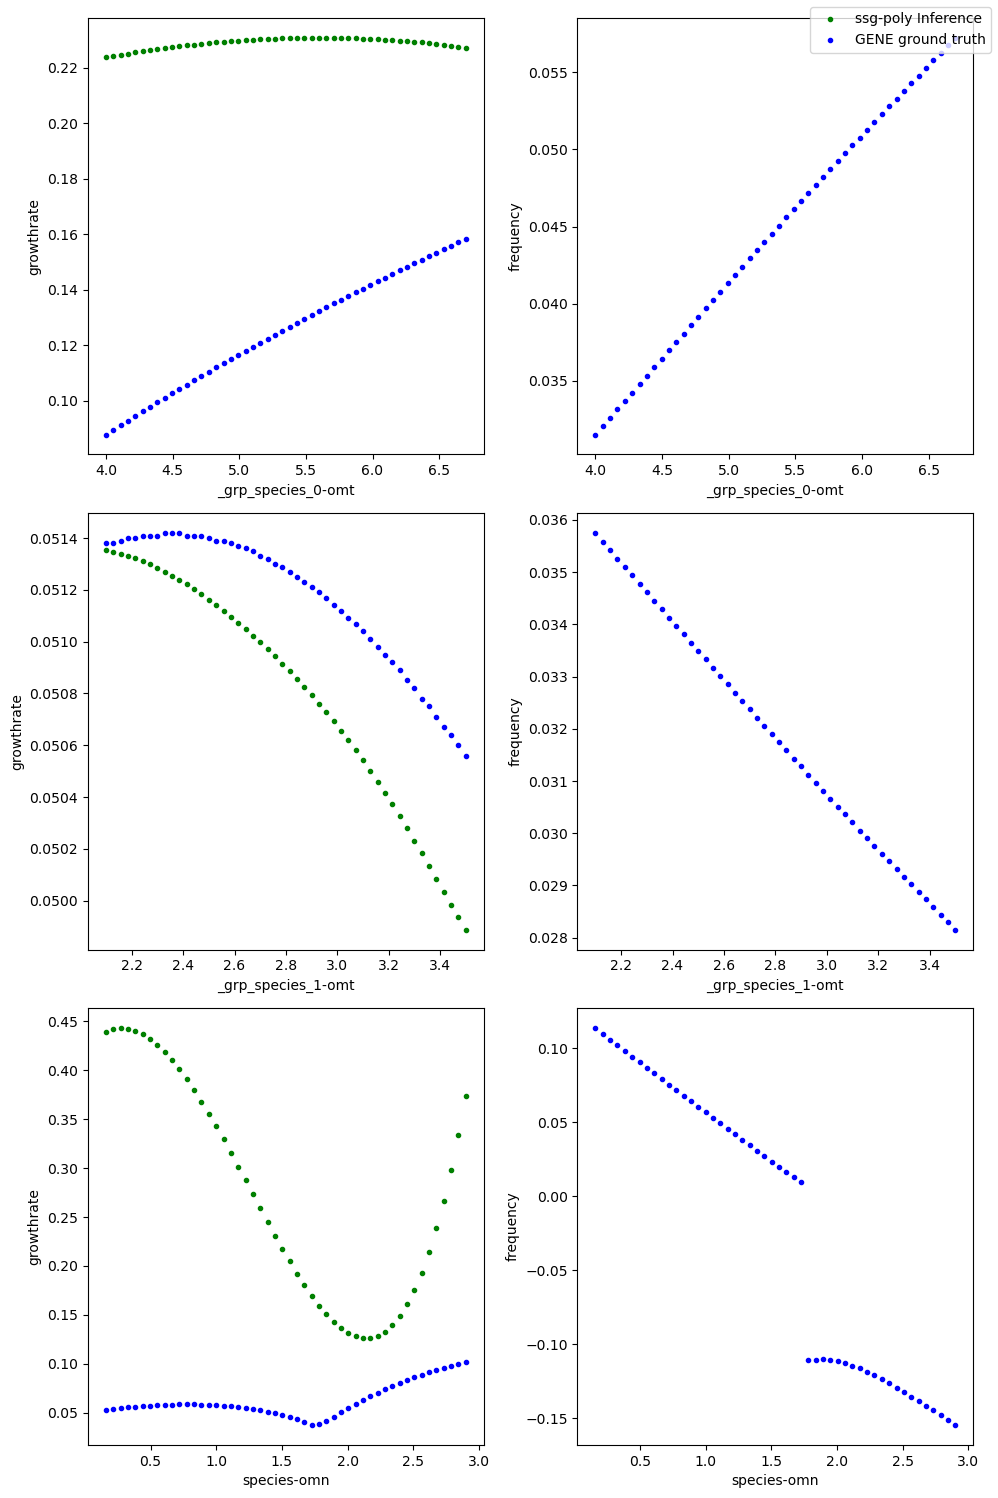

In [13]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
        else:
            infer_label = None
            gene_label = None

        # col = GENE_groundTruth[i].df.columns.values.tolist()
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            AX[i][j].plot(x, results_poly_gt.growthrates[i], '.g', label=infer_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)


Initialising dataset
SSH PATH None:None

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT
Initialising dataset
SSH PATH None:None

LOADING FROM SCA

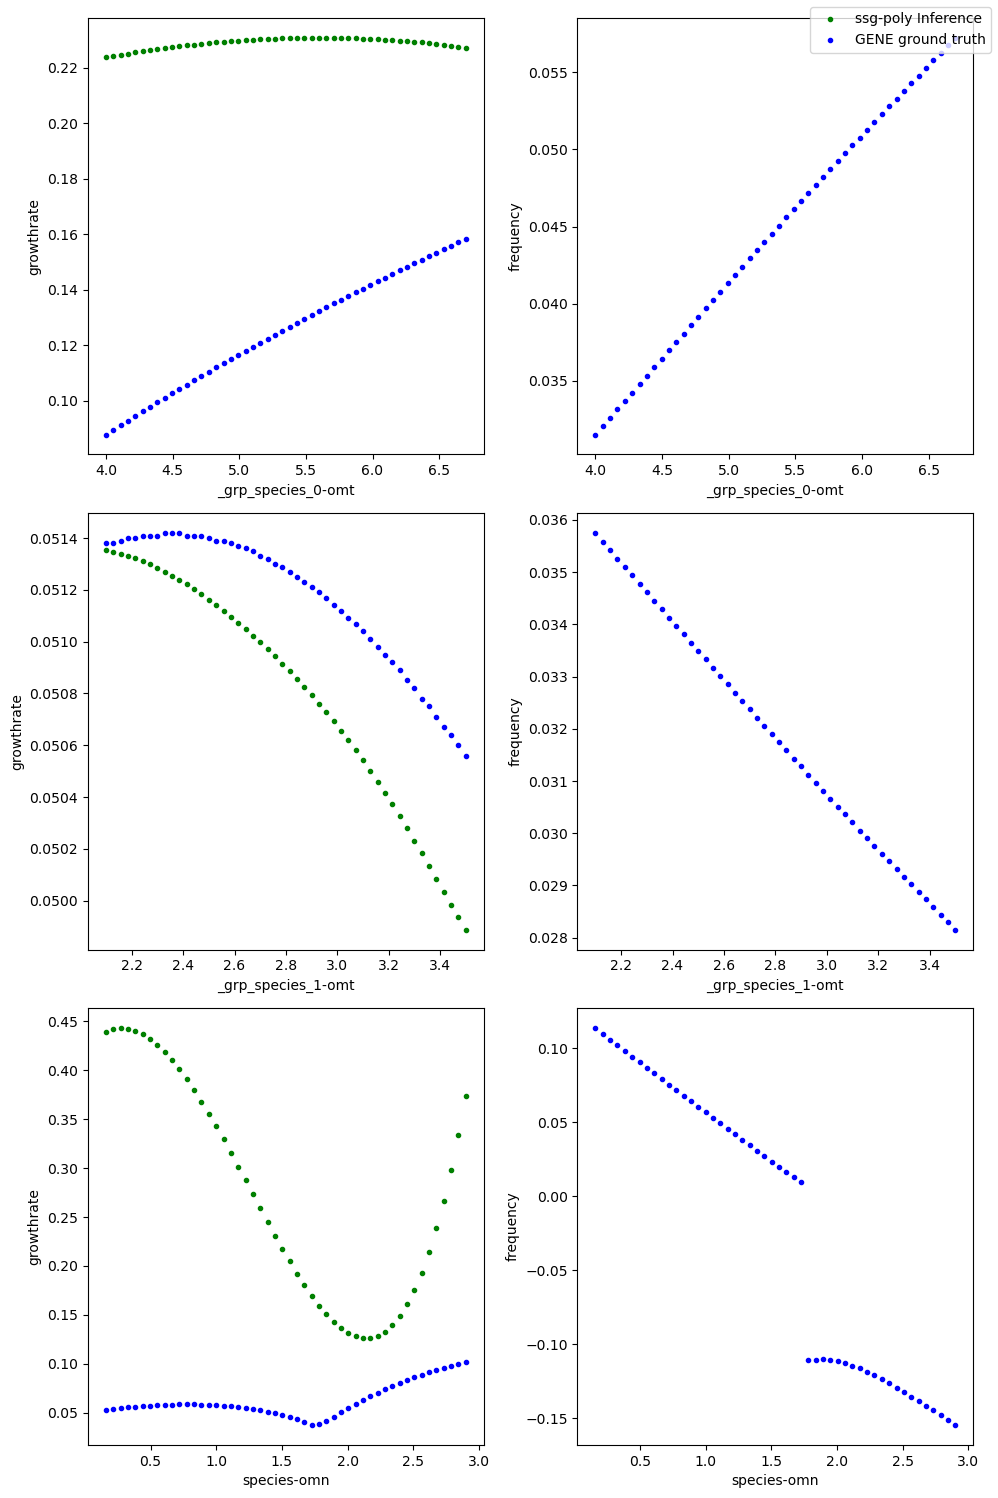

In [23]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import numpy as np
import pandas as pd

from config import config
import os

def mode_transition_test(model, results_name):
    parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
    remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
    # parser
    parser = GENE_scan_parser(config.save_dir, config.base_params_path)
    GENE_groundTruth = []
    for rms in remote_save_names:
        GENE_groundTruth.append(ScanData(rms, parser=parser, host=None, remote_path=None,  test_percentage=0))

    # Putting ground truth in correct format for inference, with other nominal parameters in place -------------   
    nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
    nominal_df = pd.DataFrame(nominal_block)
    nominal_df.columns=ssg_sampler.parameters

    for i in range(len(parameters)):
        new_df = nominal_df.copy()
        col = GENE_groundTruth[i].df.columns.values.tolist()
        new_df[ssg_sampler.parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
        new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
        new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
        new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
        GENE_groundTruth[i].df = new_df
        GENE_groundTruth[i].set_from_df()    
        # print(GENE_groundTruth[i].x[0:5])
        # print(ssg_sampler.parameters)
        # print('NEW DF', GENE_groundTruth[i].df.head(5))

    #--------------------------------------------------------------------------------
    results = ResultsGroundTruthTest(results_name)

    if os.path.exists(results.path):
        print('\nLOADING RESULTS FROM FILE\n')
        results = results.load()
        print(f'{results.name} IS LOADED')
    else:
        results.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
        for i in range(len(GENE_groundTruth)):
            print('\nCOMPUTING RESULTS\n')
            #Sampling already done, gene has been ran
            print("GT DATA NAME",GENE_groundTruth[i].name)
            results.growthrates.append(model.predict(GENE_groundTruth[i].x))
        results.save()

    import matplotlib.pyplot as plt
    gene_out = ['growthrate','frequency']
    width = 5
    height =5
    ncol = len(gene_out)
    nrow = len(GENE_groundTruth)
    figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

    for i in range(len(AX)):
        for j in range(len(AX[0])):
            if i == 0 and j == 0: 
                infer_label = 'ssg-poly Inference'
                gene_label = 'GENE ground truth'
            else:
                infer_label = None
                gene_label = None

            # col = GENE_groundTruth[i].df.columns.values.tolist()
            # print(GENE_groundTruth[i].df[parameters[i]].head(2))
            x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
            y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
            
            if j == 0:
                AX[i][j].plot(x, results.growthrates[i], '.g', label=infer_label)

            AX[i][j].plot(x, y, '.b', label =gene_label)
            AX[i][j].set_xlabel(parameters[i])
            AX[i][j].set_ylabel(gene_out[j])
            
    figure.tight_layout()
    figure.legend()
    plt.show(figure)


    

mode_transition_test(poly,'test')

# fit GPR to random data

In [14]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config(local=False)

remote_save_dir = '/scratch/project_462000451/gene_out/gene_auto/200s_3p_uq-highprec'
parser = GENE_scan_parser(config)
random_data_200 = ScanData2(config, 'code_debug_tester',  parser=parser, save_dir=remote_save_dir, split_ratio=[0.5,0.5,0], categorise=False)
random_data_200.df


<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/project_462000451/gene_out/gene_auto/200s_3p_uq-highprec'

# fit GPR to SSG points

In [14]:
%load_ext autoreload
%autoreload 2

In [48]:
len(ssg_data.x_train)

84

In [15]:
from GENE_ML.gene_ml.models.GPR import GPR
gpr = GPR(name='gpr_ssg_points_gt', kernel_type='matern32')
gpr.tune_hypers(x=ssg_data.x, y=ssg_data.growthrates)

OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 94.01172541120015
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/10, f = -403.8293013437127
Optimization restart 2/10, f = -403.82930180253396
Optimization restart 3/10, f = -403.8292965452759
Optimization restart 4/10, f = -403.82929739794497
Optimization restart 5/10, f = -403.82928329990835
Optimization restart 6/10, f = -403.82930164129607
Optimization restart 7/10, f = -403.82929357744285
Optimization restart 8/10, f = -403.82929731563024
Optimization restart 9/10, f = -403.82930185346726
Optimization restart 10/10, f = -403.8292935107435
RESULTING HYPERS:
 
Name : GP 

# Save results of GPR Ground Truth reference point inference

In [16]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_gpr_gt = ResultsGroundTruthTest(name='results_gpr_matern32_2-ssg_gt-highprec2')
if os.path.exists(results_gpr_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr_gt = results_gpr_gt.load()
    print(f'{results_gpr_gt.name} IS LOADED')
else:
    results_gpr_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_gpr_gt.growthrates.append(gpr.predict(GENE_groundTruth[i].x))
    results_gpr_gt.save()


COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_0-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_1-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-species-omn


# Plotting results of GPR-ssg ground truth experiment

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


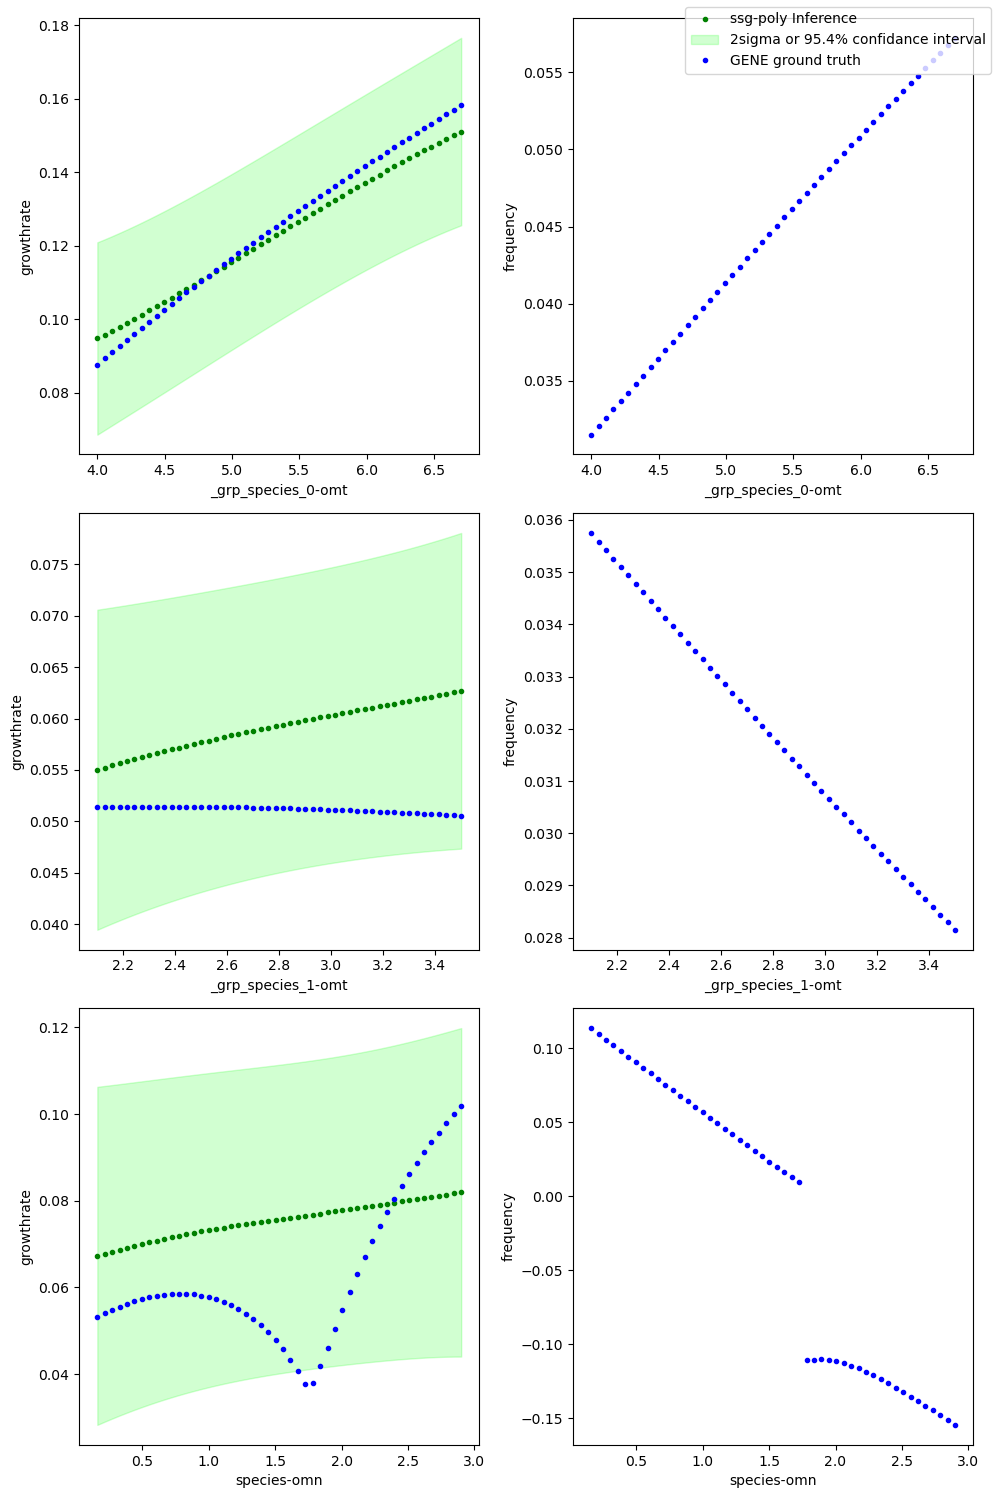

In [17]:
# import matplotlib.pyplot as plt
# gene_out = ['growthrate','frequency']
# width = 5
# height =5
# ncol = len(gene_out)
# nrow = len(GENE_groundTruth)
# figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

# for i in range(len(AX)):
#     for j in range(len(AX[0])):
#         if i == 0 and j == 0: 
#             infer_label = 'ssg-GPR Inference'
#             gene_label = 'GENE ground truth'
#             error_label = '2sigma or 95.4% confidance interval'
#         else:
#             infer_label = None
#             gene_label = None
#             error_label = None
#         col = GENE_groundTruth[i].df.columns.values.tolist()
#         x = GENE_groundTruth[i].df[col[i]].to_numpy(dtype=float)
#         y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
#         # if j == 0:
#         #     mean = results_gpr_gt.growthrates[i][0]
#         #     twosig = results_gpr_gt.growthrates[i][1]
#         #     AX[i][j].plot(x, mean, '.g', label = infer_label)
#         #     AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

#         AX[i][j].plot(x, y, '.b', label = gene_label)
#         AX[i][j].set_xlabel(col[i])
#         AX[i][j].set_ylabel(gene_out[j])
        
# figure.legend()
# figure.tight_layout()
# plt.show(figure)

import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
            error_label = '2sigma or 95.4% confidance interval'
        else:
            infer_label = None
            gene_label = None
            error_label = None
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            mean = results_gpr_gt.growthrates[i][0]
            twosig = results_gpr_gt.growthrates[i][1]
            AX[i][j].plot(x, mean, '.g', label = infer_label)
            AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)


# GPR - 200 uniform

In [15]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
import os
config = Config(local=True)

parser = GENE_scan_parser(config)
#data_name = f'{num_samples}s_{len(parameters)}p_uq'#'1000s_2p_uq'
data_name = 'UQ-DEMO-highprec-uniform'#'200s_3p_uq-highprec'
# rand_test_percentage=50
remote_save_dir = os.path.join(config.remote_save_base_dir, data_name)
random_data = ScanData(data_name, parser, config, host=config.host, remote_save_dir=remote_save_dir, test_percentage=0.001)
random_data.df
# display(random_data.df.head())
# print(random_data.x[0])

# display(SSG_data.df.head())
# print(SSG_data.x[0])

Initialising dataset
SSH PATH lumi:/scratch/project_462000451/gene_out/gene_auto/UQ-DEMO-highprec-uniform
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/geneerr_batch-1_scanfiles-0.log

200 SAMPLES RAN OUT OF 212 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 200
NaN PERCENTAGE =  0.0
SETTING VARIABLES

RANDOMLY SPL

,run_time,omt2,omt1,omn1,growthrate,frequency
0,20.950,2.484996,4.499231,0.883268,0.099887,0.096284
1,23.222,2.934477,4.539037,1.456623,0.102207,0.058905
2,17.887,3.051881,6.083308,1.966819,0.135272,0.042262
3,20.459,2.858069,5.836209,1.272154,0.132430,0.083876
4,21.970,2.664542,5.275577,0.202671,0.112418,0.144319
...,...,...,...,...,...,...
95,20.012,3.417640,6.094214,0.632766,0.137802,0.121628
96,18.654,3.173110,6.183974,2.193758,0.135426,0.027724
97,16.664,3.008549,4.876698,2.101325,0.103935,0.020260
98,19.021,2.399705,4.656747,0.177257,0.096337,0.141250


In [16]:
import os
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
model_name = 'GPR'
#results_gpr_name = f'random_data_{rand_test_percentage}tp_gpr.results'#f'uq_results_{num_samples}s_{len(parameters)}p_{model_name}_{test_percentage}tp' #
results_gpr_name = 'gpr_UQ_high_prec.results'
results_gpr = Results(results_gpr_name)

if False:#os.path.exists(results_gpr.path):
    
    gpr = GPR(name='random_data_gpr.model')
    gpr.train(random_data.x_train, random_data.growthrate_train)
    gpr.tune_hypers(random_data.x_train, random_data.growthrate_train)
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr = results_gpr.load()
    print(f'{results_gpr.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    gpr = GPR(name='random_data_gpr.model')
    gpr.train(random_data.x_train, random_data.growthrate_train)
    gpr.tune_hypers(random_data.x_train, random_data.growthrate_train)

    results_gpr.growthrate_predict_seen, growthrate_predict_seen_errors = gpr.predict(random_data.x_train)
    results_gpr.growthrate_predict_unseen, growthrate_predict_unseen_errors = gpr.predict(random_data.x_test)

    # results_gpr.save()


COMPUTING RESULTS

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 208.05733282134187
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/10, f = -1112.4890154478592
Optimization restart 2/10, f = -1112.4889788783955
Optimization restart 3/10, f = -1112.489015534239
Optimization restart 4/10, f = -1112.4890155243581
Optimization restart 5/10, f = -1112.4890153648626
Optimization restart 6/10, f = -1112.4890151722075
Optimization restart 7/10, f = -1112.489015532991
Optimization restart 8/10, f = -1112.4890155

In [17]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_gpr_gt = ResultsGroundTruthTest(name='results_gpr-200s_uqdemo')
if os.path.exists(results_gpr_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr_gt = results_gpr_gt.load()
    print(f'{results_gpr_gt.name} IS LOADED')
else:
    results_gpr_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_gpr_gt.growthrates.append(gpr.predict(GENE_groundTruth[i].x))
    results_gpr_gt.save()


LOADING RESULTS FROM FILE

results_gpr-200s_uqdemo IS LOADED


0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


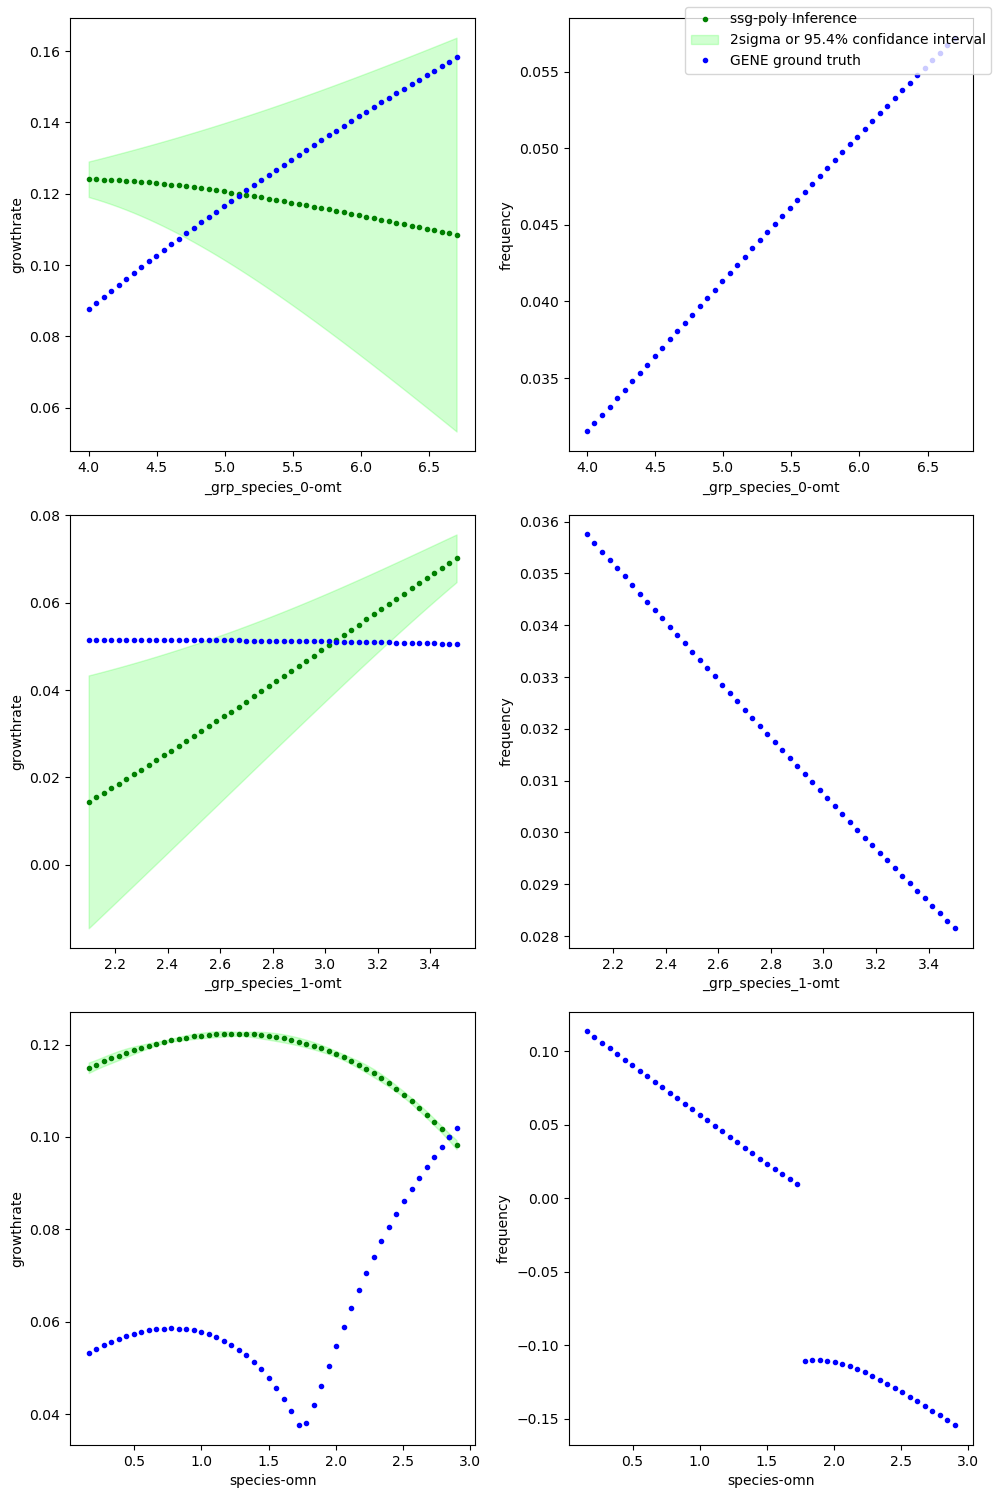

In [18]:
# import matplotlib.pyplot as plt
# gene_out = ['growthrate','frequency']
# width = 5
# height =5
# ncol = len(gene_out)
# nrow = len(GENE_groundTruth)
# figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

# for i in range(len(AX)):
#     for j in range(len(AX[0])):
#         if i == 0 and j == 0: 
#             infer_label = 'ssg-GPR Inference'
#             gene_label = 'GENE ground truth'
#             error_label = '2sigma or 95.4% confidance interval'
#         else:
#             infer_label = None
#             gene_label = None
#             error_label = None
#         col = GENE_groundTruth[i].df.columns.values.tolist()
#         x = GENE_groundTruth[i].df[col[i]].to_numpy(dtype=float)
#         y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
#         # if j == 0:
#         #     mean = results_gpr_gt.growthrates[i][0]
#         #     twosig = results_gpr_gt.growthrates[i][1]
#         #     AX[i][j].plot(x, mean, '.g', label = infer_label)
#         #     AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

#         AX[i][j].plot(x, y, '.b', label = gene_label)
#         AX[i][j].set_xlabel(col[i])
#         AX[i][j].set_ylabel(gene_out[j])
        
# figure.legend()
# figure.tight_layout()
# plt.show(figure)

import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
            error_label = '2sigma or 95.4% confidance interval'
        else:
            infer_label = None
            gene_label = None
            error_label = None
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            mean = results_gpr_gt.growthrates[i][0]
            twosig = results_gpr_gt.growthrates[i][1]
            AX[i][j].plot(x, mean, '.g', label = infer_label)
            AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)


# Same Scale

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


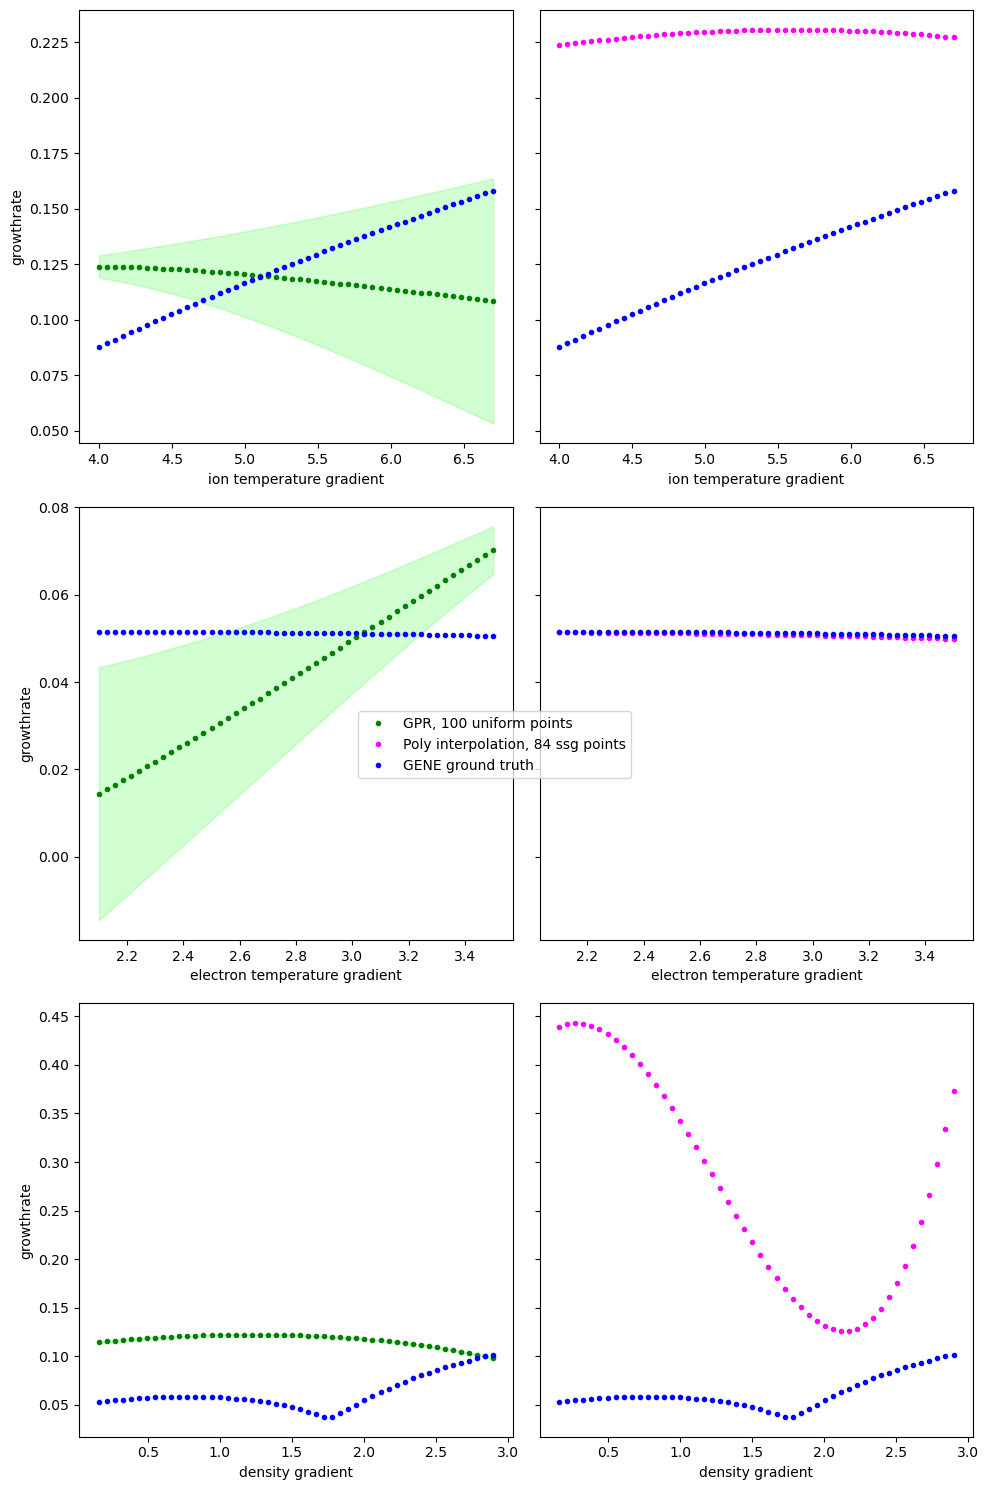

In [46]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = 2
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height), sharey='row')

x_labels = ['ion temperature gradient', 'electron temperature gradient', 'density gradient']

for i in range(len(AX)):
    for j in range(1):
        if i == 0 and j == 0: 
            infer_label = 'GPR, 100 uniform points'
            gene_label = 'GENE ground truth'
            error_label = '2sigma or 95.4% confidance interval'
        else:
            infer_label = None
            gene_label = None
            error_label = None
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            mean = results_gpr_gt.growthrates[i][0]
            twosig = results_gpr_gt.growthrates[i][1]
            AX[i][j].plot(x, mean, '.g', label = infer_label)
            AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2])

        AX[i][j].plot(x, y, '.b', label =None)
        AX[i][j].set_xlabel(x_labels[i])
        AX[i][j].set_ylabel(gene_out[j])
        

# for i in range(len(AX)):
#     j=1
#     if i == 0 and j == 0: 
#         infer_label = 'ssg-poly Inference'
#         gene_label = 'GENE ground truth'
#         error_label = '2sigma or 95.4% confidance interval'
#     else:
#         infer_label = None
#         gene_label = None
#         error_label = None
#     print(GENE_groundTruth[i].df[parameters[i]].head(2))
#     x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
#     y = GENE_groundTruth[i].df[gene_out[0]].to_numpy(dtype=float)
    
#     if j == 1:
#         mean = results_gpr_gt.growthrates[i][0]
#         twosig = results_gpr_gt.growthrates[i][1]
#         AX[i][j].plot(x, mean, '.g', label = infer_label)
#         AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

#     AX[i][j].plot(x, y, '.b', label =gene_label)
#     AX[i][j].set_xlabel(parameters[i])
#     AX[i][j].set_ylabel(gene_out[j])
        
for i in range(len(AX)):
    j=1
    if i == 0 and j == 1: 
        infer_label = 'Poly interpolation, 84 ssg points'
        gene_label = 'GENE ground truth'
    else:
        infer_label = None
        gene_label = None

    # col = GENE_groundTruth[i].df.columns.values.tolist()
    print(GENE_groundTruth[i].df[parameters[i]].head(2))
    x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
    y = GENE_groundTruth[i].df[gene_out[0]].to_numpy(dtype=float)
    
    if j == 1:
        AX[i][j].plot(x, results_poly_gt.growthrates[i], '.', color = 'magenta', label=infer_label)

    AX[i][j].plot(x, y, '.b', label =gene_label)
    AX[i][j].set_xlabel(x_labels[i])
    # AX[i][j].set_ylabel(gene_out[j])
figure.tight_layout()
figure.legend(loc='center')
plt.show(figure)